***CHURN PREDICTION USING MACHINE LEARNING***




*Importing neccessary libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright','dark_background'])
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import *

*Importing Dataset from 'churn_prediction_simple.csv' File*

In [ ]:
data = pd.read_csv('churn_prediction_simple.csv')

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

***DataSet Distribution***

In [ ]:
data['churn'].value_counts()/len(data)
#As It outputs for two classes of 0 and 1 where the ratio is like 4:1 which is
# the distribution of data

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

***Seperation the dataset into independent and dependent variables***

In [ ]:
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

***Scaling the data***

In [ ]:
scaler_object = StandardScaler()
scaled_X = scaler_object.fit_transform(X)

***Splitting the data into train and test respectively***

In [ ]:
X_train,X_test,Y_train,Y_test = tts(X , Y, test_size = 0.20)

# **Model Building**

In [ ]:
churn_model = LR(class_weight = 'balanced')

***Fitting the Model***

In [ ]:
churn_model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

***Predicting classes***

In [ ]:
churn_pr_cls = churn_model.predict(X_test)

***Predicting Probabilites***

In [ ]:
churn_pr_probabilities = churn_model.predict_proba(X_test)

In [ ]:
print(churn_pr_cls)

[1 0 1 ... 1 0 1]


In [ ]:
print(churn_pr_probabilities)

[[0.26045057 0.73954943]
 [0.52355824 0.47644176]
 [0.47631532 0.52368468]
 ...
 [0.47454702 0.52545298]
 [0.66317246 0.33682754]
 [0.38163332 0.61836668]]


In [ ]:
##Finding Accuracy for the classifier
churn_model_acc = churn_model.score(X_test,Y_test)
churn_model_acc = churn_model_acc * 100
churn_model_acc = round(churn_model_acc , 2)
print('The accuracy of the Churn model is ',churn_model_acc,'%')

The accuracy of the Churn model is  74.4 %


In [ ]:
##Finding Precision for the classifier
churn_model_precision = precision_score(Y_test , churn_pr_cls)
churn_model_precision = round((churn_model_precision * 100),2)
print('The Precision of the Churn model is ',churn_model_precision,'%')

The Precision of the Churn model is  39.59 %


In [ ]:
##Finding Recall for the Classifier
churn_model_recall = recall_score(Y_test, churn_pr_cls)
churn_model_recall = round((churn_model_recall * 100) , 2)
print('The Recall of the Churn Model is ',churn_model_recall,'%')

The Recall of the Churn Model is  60.86 %


In [ ]:
##Finding F1-Score for the Classifier
churn_model_f1_score = f1_score(Y_test ,churn_pr_cls)
churn_model_f1_score = round((churn_model_f1_score * 100) , 2)
print('The F1-Score of the Churn Model is ',churn_model_f1_score,'%')

The F1-Score of the Churn Model is  47.97 %


In [ ]:
##Brief Report on the Churn Model
print(classification_report(Y_test , churn_pr_cls))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      3558
           1       0.40      0.61      0.48       856

    accuracy                           0.74      4414
   macro avg       0.64      0.69      0.65      4414
weighted avg       0.80      0.74      0.76      4414



***PRECISION-RECALL TRADE OFF CURVE***

In [ ]:
precision_points, recall_points , threshold_points = precision_recall_curve(
    Y_test,
    churn_pr_probabilities[:,1]
)

In [ ]:
##printing the shape of respective points
print(precision_points.shape,recall_points.shape,threshold_points.shape)

(4415,) (4415,) (4414,)


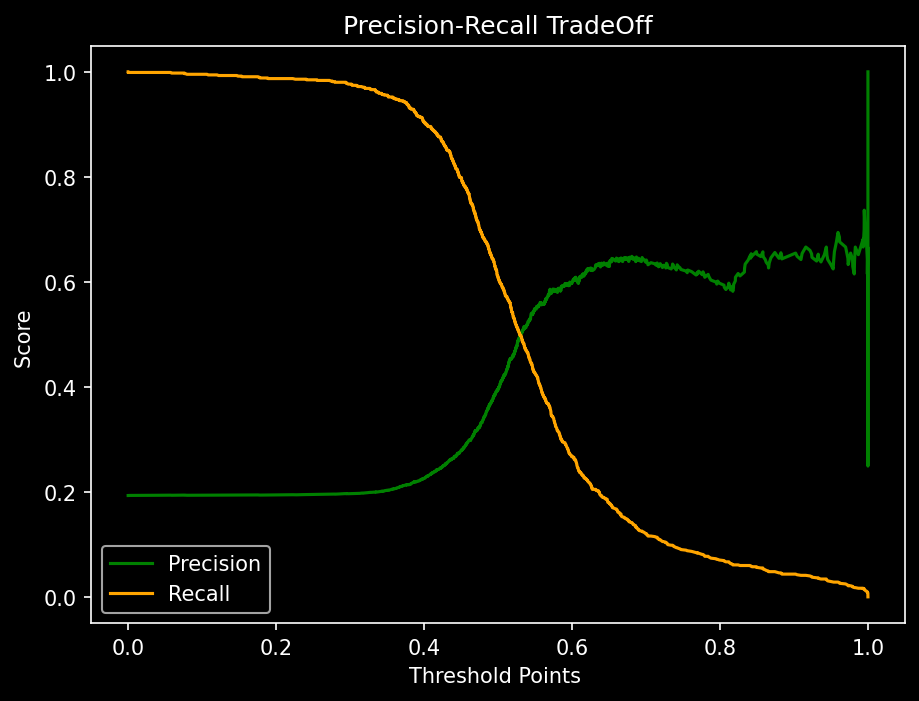

In [ ]:
###Plotting the Precision-Recall Curve
plt.figure(figsize = (7,5),dpi = 150)
plt.plot(threshold_points,precision_points[:-1],color = 'green',label = 'Precision')
plt.plot(threshold_points,recall_points[:-1],color = 'orange',label = 'Recall')
plt.xlabel('Threshold Points ',fontsize = 10)
plt.ylabel('Score ', fontsize = 10)
plt.title('Precision-Recall TradeOff')
plt.legend()

***AUC-ROC Curve***

In [ ]:
##importing necessary libraries
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
false_positive_rate,true_positive_rate, threshold = roc_curve(Y_test ,churn_pr_cls )

In [ ]:
##plotting the auc-roc curve

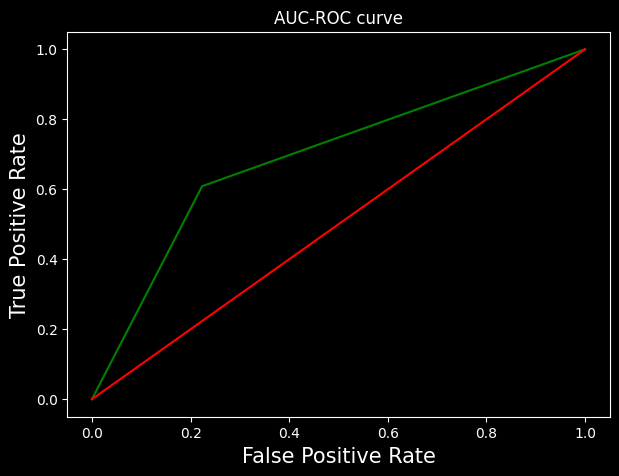

In [ ]:
plt.figure(dpi = 100, figsize = (7,5))
plt.plot(false_positive_rate , true_positive_rate, color = 'green')
plt.plot([0 , 1], [ 0 , 1] , label = 'baseline', color = 'red')
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
plt.title('AUC-ROC curve')
plt.show()

In [ ]:
###Producing the auc-roc curve score percentage
ra = roc_auc_score(Y_test , churn_pr_cls)
print('The percentage of auc-roc curve is ',round(ra*100,2),'%')

The percentage of auc-roc curve is  69.26 %


***COEFFICIENT-PLOT OF LOGISTIC REGRESSION***

In [ ]:
coefficients = churn_model.coef_.reshape(-1)
columns_churn = X.columns
coeff_plot = pd.DataFrame({
    'coeff':coefficients,
    'Variable':columns_churn
})
coeff_plot = coeff_plot.sort_values(by = 'coeff')

In [ ]:
coeff_plot.head()

,coeff,Variable
8,-0.001365,days_since_last_transaction
0,-0.000095,vintage
9,-0.000092,current_balance
1,-0.000080,age
4,-0.000010,occupation


Text(0.5, 1.0, 'Coefficient Plot')

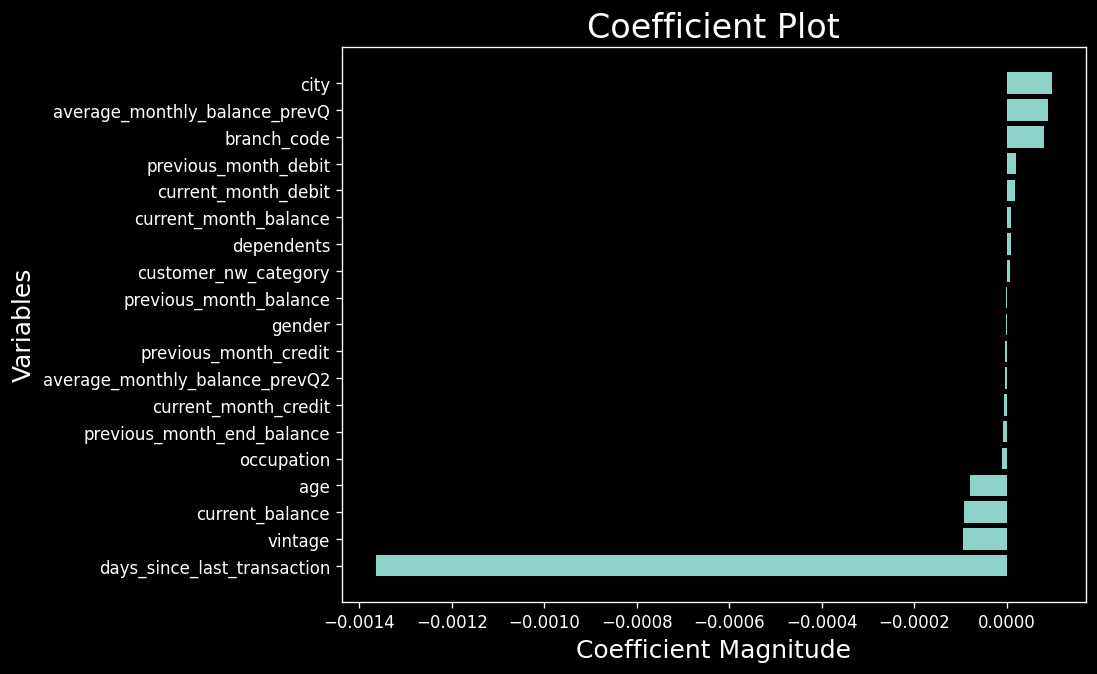

In [ ]:
###Plotting the Coefficient Plot
plt.figure(figsize = (8 , 6), dpi = 120)
plt.barh(coeff_plot['Variable'] , coeff_plot['coeff'])
plt.xlabel('Coefficient Magnitude',fontsize = 15)
plt.ylabel('Variables',fontsize = 15)
plt.title('Coefficient Plot',fontsize = 20)

In [ ]:
print('THE END ')

THE END 


In [ ]:
print("THank you Connections")

THank you Connections
